#  **The Sparks Foundation**

## **Data Science And Business Analytics Internship (GRIP July21)**

# **Author: Sagar Gaikwad**

### **Problem Statement: What will be predicted score if student studies for 9.25hrs/ Day?**

In [92]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
#Importing the dataset

url="http://bit.ly/w-data"
data=pd.read_csv(url)

print("First 10 elements of dataset")
data.head(10)

First 10 elements of dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
#Exploratory Analysis

print(data.dtypes)

print(data.shape)

print(data.info())

print(data.describe(include="all"))

Hours     float64
Scores      int64
dtype: object
(25, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [68]:
#Check Missing Values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

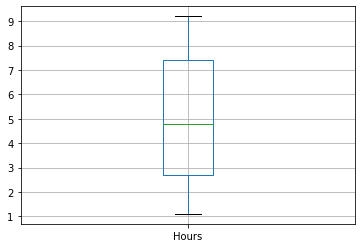

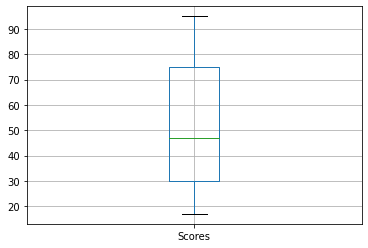

In [19]:
#Outliers should not be in the dataset

for i in data.columns:
    data.boxplot(column=i)
    plt.show()

**As checked major outliers are not there in the data.**

## Data Visualization

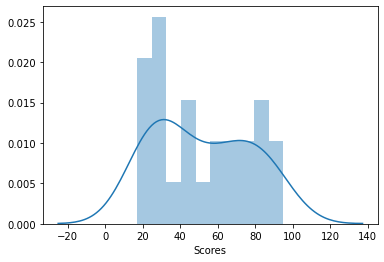

In [21]:
#visualizing the target variable with an distrubution Plot

sns.distplot(data['Scores'], bins=10)
plt.show()

Observation:- Scores are normally distributed with skewness towards positive side.

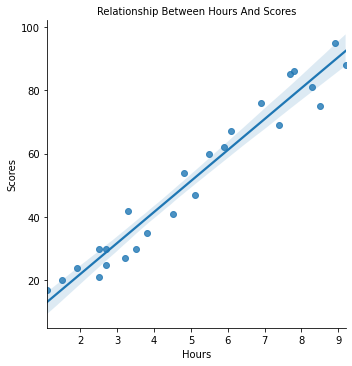

In [23]:
#Visualizing the dataset columns via scatter diagram
sns.lmplot(data=data, x="Hours" ,y="Scores")
plt.title('Relationship Between Hours And Scores',size=10)
plt.show()

As observed there is positive relationship between the number of hours and score.

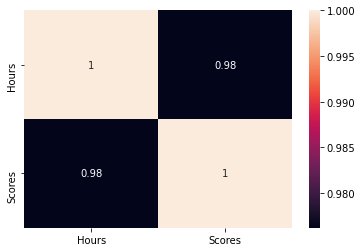

In [24]:
#Correlation Matrix

sns.heatmap(data.corr(),annot=True)

As checked in heatmap Hours and Scores are positively correlated to each other.

## Preparing the data for Linear Regression

In [37]:
x = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values

In [38]:
#Splitting the data into training and testing.

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.3 , random_state=2) 

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


### **Training Linear Regression model**

In [51]:
scores_lrg=LinearRegression()
scores_lrg.fit(x_train,y_train)

LinearRegression()

### **Predicting the score**



In [50]:
y_pred = scores_lrg.predict(x_test)
y_pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

### **Evaluating Train and Test score**

In [57]:
print('Training Score : ', scores_lrg.score(x_train,y_train))
print('Test Score : ',scores_lrg.score(x_test,y_test))

Training Score :  0.9496868783142939
Test Score :  0.9420584734434517


### **Compairing Actual Score and Predicted Score** 

In [59]:
output= pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred,'Residual':y_test-y_pred})
print(output.head())

   Actual Score  Predicted Score  Residual
0            17        11.029003  5.970997
1            21        25.628017 -4.628017
2            24        19.371297  4.628703
3            88        95.494730 -7.494730
4            76        71.510634  4.489366


### **Visualize the Predicted and Actual Scores** 

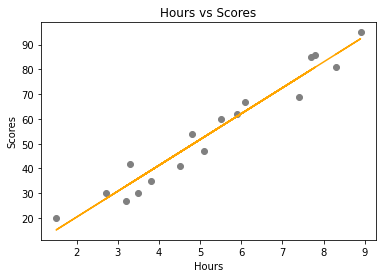

In [66]:
#Training data scores vs Predicted scores

plt.scatter(x_train,y_train,color='grey')
plt.plot(x_train,scores_lrg.predict(x_train),color='orange')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Text(0.5, 1.0, 'Actual Scores vs Predicted Scores')

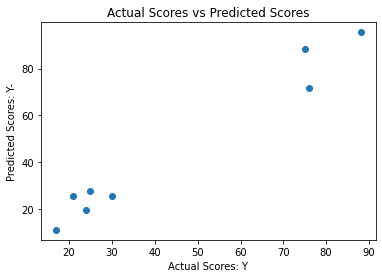

In [95]:
#Testing data scores vs Predicted scores
x=y_test
y=y_pred
plt.scatter(x, y)
plt.xlabel("Actual Scores: Y")
plt.ylabel("Predicted Scores: Y-")
plt.title("Actual Scores vs Predicted Scores")

## Evaluating the model

We will evaluate model using metrics like: 

        - mean_absolute_error
        - mean_squared_error
        - R2_score

In [88]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))


#Goodness of fit (R2)

metrics.r2_score(y_test,y_pred)

Mean Absolute Error: 5.936576124243742
Root Mean Squared Error: 2.4365090035219943


0.9420584734434517

Observation:-
The Linear Regression Model is doing well, Reason-  Mean Absolute Error & R2 values are less. 

### What will be predicted score if a student study for 9.25 hrs in a day?

In [93]:
study_hours=9.25
score_pred=scores_lrg.predict([[study_hours]])
print("Number of hours = {}".format(study_hours))
print("Predicted scores ={}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores =96.01612299632009


### As per Linear Regression Model if Studies for 9.25 hours student is likely to score 96.01 